In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('Social_Network_Ads.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [59]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
df = df.iloc[:,2:]

In [61]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [62]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,0:2]
y= df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
import seaborn as sns

/home/koushik/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

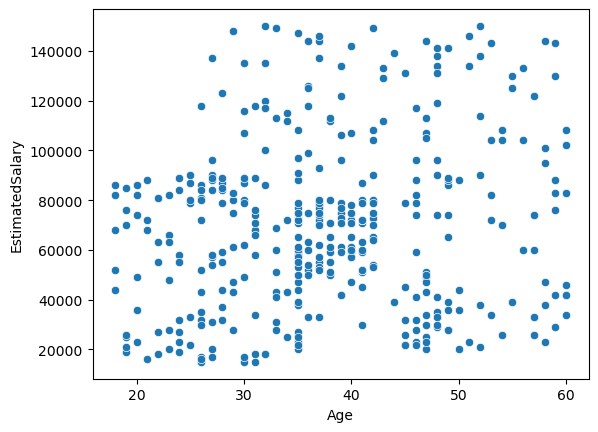

In [64]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

In [65]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [66]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation ='sigmoid'))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 642.7834 - accuracy: 0.5594 - val_loss: 182.1756 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 161.8206 - accuracy: 0.4844 - val_loss: 77.4762 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 43.5688 - accuracy: 0.4906 - val_loss: 34.4818 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 33.8977 - accuracy: 0.4719 - val_loss: 41.1808 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 16.3489 - accuracy: 0.5781 - val_loss: 18.0001 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 38.8964 - accuracy: 0.5219 - val_loss: 75.0863 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 110.6904 - accuracy: 0.5031 - val_loss: 132.7220 - val_accuracy: 

Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 49.8195 - accuracy: 0.5344 - val_loss: 70.3189 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 50.4814 - accuracy: 0.5063 - val_loss: 1.8386 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 61.9316 - accuracy: 0.5344 - val_loss: 110.0624 - val_accuracy: 0.6000
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 78.4144 - accuracy: 0.5469 - val_loss: 29.6969 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 26.6276 - accuracy: 0.5219 - val_loss: 9.4179 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 43.6664 - accuracy: 0.5188 - val_loss: 37.6705 - val_accuracy: 0.4000
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 37.4421 - accuracy: 0.5344 - val_loss: 3.4931 - val_accuracy: 0

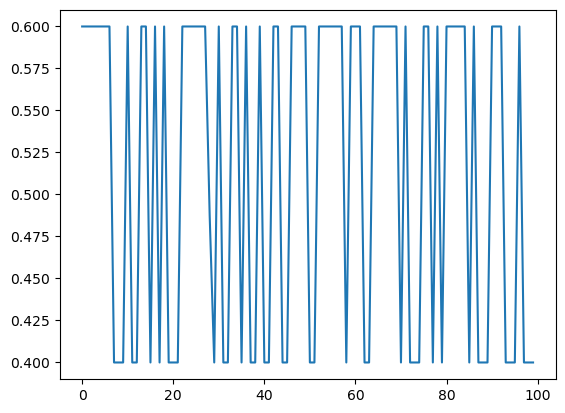

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [71]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [72]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

/home/koushik/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

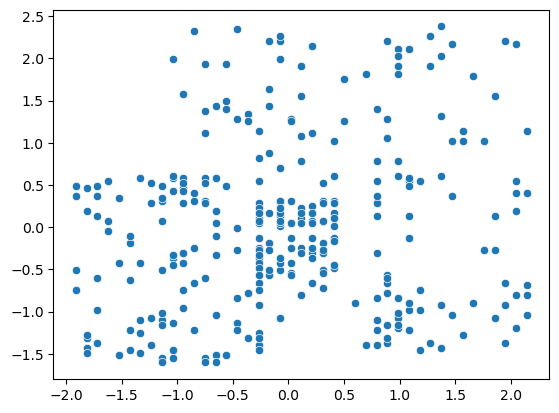

In [73]:
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1] )

In [74]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 40ms/step - loss: 0.6947 - accuracy: 0.5844 - val_loss: 0.6641 - val_accuracy: 0.6875
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.7688 - val_loss: 0.6061 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.8125 - val_loss: 0.5581 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.8188 - val_loss: 0.5168 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5138 - accuracy: 0.8375 - val_loss: 0.4814 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.8438 - val_loss: 0.4512 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8469 - val_loss: 0.4247 - val_accuracy: 0.7875
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9094 - val_loss: 0.2655 - val_accuracy: 0.9125
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9094 - val_loss: 0.2633 - val_accuracy: 0.9125
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9094 - val_loss: 0.2623 - val_accuracy: 0.9250
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.9094 - val_loss: 0.2622 - val_accuracy: 0.9250
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.9094 - val_loss: 0.2638 - val_accuracy: 0.9125
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2346 - accuracy: 0.9094 - val_loss: 0.2634 - val_accuracy: 0.9250
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.9094 - val_loss: 0.2647 - val_accuracy: 0.9125
Epoch 

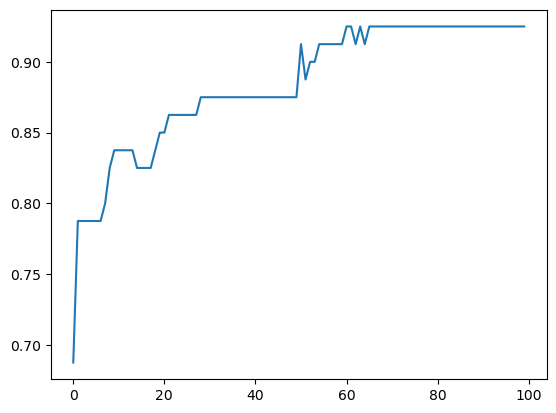

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])